# Load the Data

In [2]:
## Problem 1 ##
library(PerformanceAnalytics)
library(xtable)
data = read.csv("germancredit.csv", header = T)
str(data)

'data.frame':	1000 obs. of  21 variables:
 $ Default        : int  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : chr  "A93" "A92" "A93" "A93" ...
 $ others         : chr  "A101" "A101" "A101" "A103" ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : chr  "A121" "A121" "A121" "A122" ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ housing        : chr  "A152" "A152" "A152" "A153" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ job            : 

In [3]:
sum(is.na(data))

[1] 0

# Perform an exploratory analysis of data.


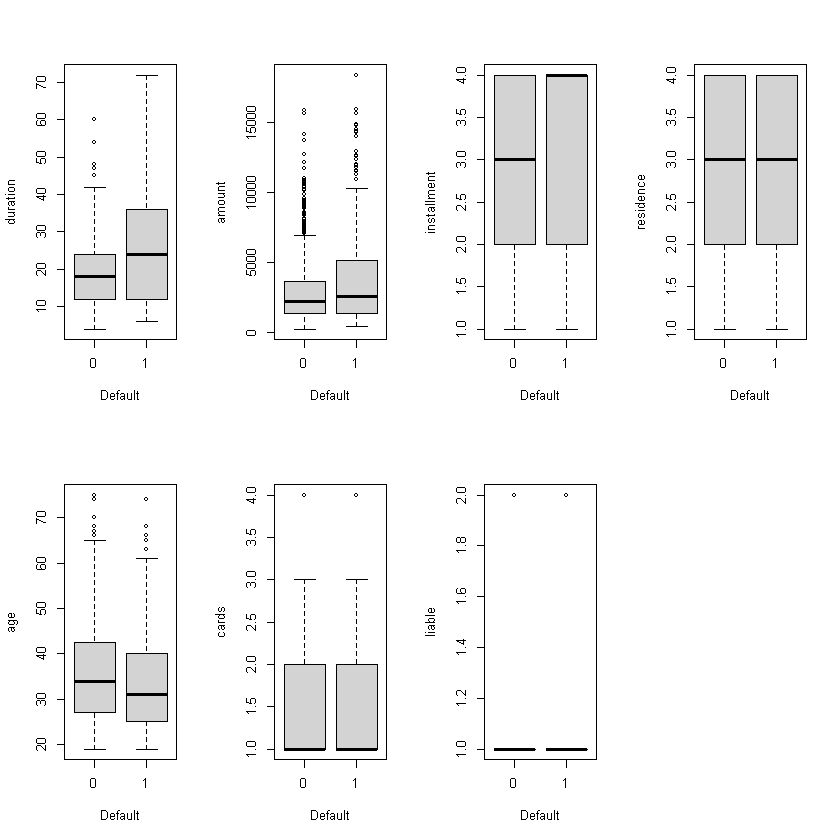

In [4]:
# (a)



par(mfrow=c(2,4))
boxplot(data$duration ~ data$Default, ylab="duration", xlab="Default")
boxplot(data$amount ~ data$Default, ylab="amount", xlab="Default")
boxplot(data$installment ~ data$Default, ylab="installment", xlab="Default")
boxplot(data$residence ~ data$Default, ylab="residence", xlab="Default")
boxplot(data$age ~ data$Default, ylab="age", xlab="Default")
boxplot(data$cards ~ data$Default, ylab="cards", xlab="Default")
boxplot(data$liable ~ data$Default, ylab="liable", xlab="Default")


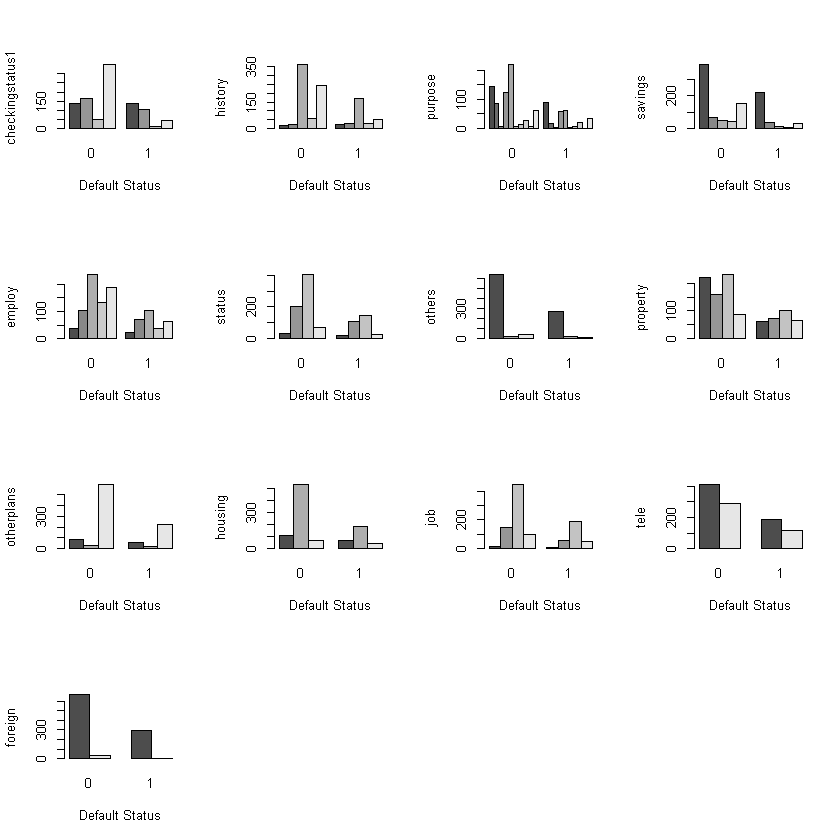

In [5]:
par(mfrow=c(4,4))
barplot(table(data$checkingstatus1, data$Default), beside = TRUE, xlab="Default Status", ylab="checkingstatus1")
barplot(table(data$history, data$Default), beside = TRUE, xlab="Default Status", ylab="history")
barplot(table(data$purpose, data$Default), beside = TRUE, xlab="Default Status", ylab="purpose")
barplot(table(data$savings, data$Default), beside = TRUE, xlab="Default Status", ylab="savings")
barplot(table(data$employ, data$Default), beside = TRUE, xlab="Default Status", ylab="employ")
barplot(table(data$status, data$Default), beside = TRUE, xlab="Default Status", ylab="status")
barplot(table(data$others, data$Default), beside = TRUE, xlab="Default Status", ylab="others")
barplot(table(data$property, data$Default), beside = TRUE, xlab="Default Status", ylab="property")
barplot(table(data$otherplans, data$Default), beside = TRUE, xlab="Default Status", ylab="otherplans")
barplot(table(data$housing, data$Default), beside = TRUE, xlab="Default Status", ylab="housing")
barplot(table(data$job, data$Default), beside = TRUE, xlab="Default Status", ylab="job")
barplot(table(data$tele, data$Default), beside = TRUE, xlab="Default Status", ylab="tele")
barplot(table(data$foreign, data$Default), beside = TRUE, xlab="Default Status", ylab="foreign")



In [6]:
# (b)
#building reasonably good model
fit_1 = glm(Default~.,family="binomial", data = data)
summary(fit_1)



Call:
glm(formula = Default ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3410  -0.6994  -0.3752   0.7095   2.6116  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         4.005e-01  1.084e+00   0.369 0.711869    
checkingstatus1A12 -3.749e-01  2.179e-01  -1.720 0.085400 .  
checkingstatus1A13 -9.657e-01  3.692e-01  -2.616 0.008905 ** 
checkingstatus1A14 -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
duration            2.786e-02  9.296e-03   2.997 0.002724 ** 
historyA31          1.434e-01  5.489e-01   0.261 0.793921    
historyA32         -5.861e-01  4.305e-01  -1.362 0.173348    
historyA33         -8.532e-01  4.717e-01  -1.809 0.070470 .  
historyA34         -1.436e+00  4.399e-01  -3.264 0.001099 ** 
purposeA41         -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
purposeA410        -1.489e+00  7.764e-01  -1.918 0.055163 .  
purposeA42         -7.916e-01  2.610e-01  -3.033 0.002421 *

In [7]:

fit_2 = glm(Default~ checkingstatus1+history+purpose+savings+employ+status+others+property
+otherplans+housing+foreign+duration+amount+age+installment , family="binomial", data = data)
fit_2




Call:  glm(formula = Default ~ checkingstatus1 + history + purpose + 
    savings + employ + status + others + property + otherplans + 
    housing + foreign + duration + amount + age + installment, 
    family = "binomial", data = data)

Coefficients:
       (Intercept)  checkingstatus1A12  checkingstatus1A13  checkingstatus1A14  
         1.6109391          -0.4268653          -1.0471194          -1.7297942  
        historyA31          historyA32          historyA33          historyA34  
        -0.0211952          -0.7476667          -0.8618422          -1.4037066  
        purposeA41         purposeA410          purposeA42          purposeA43  
        -1.6579438          -1.6380308          -0.8013625          -0.8977885  
        purposeA44          purposeA45          purposeA46          purposeA48  
        -0.5869776          -0.1345251           0.0207578          -2.0059354  
        purposeA49          savingsA62          savingsA63          savingsA64  
        -0.763719

In [8]:
anova(fit_2, fit_1, test = "Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,958,902.3546,NA,NA,NA
2,951,895.8178,7,6.536788,0.4786454


In [9]:
summary(fit_2)


Call:
glm(formula = Default ~ checkingstatus1 + history + purpose + 
    savings + employ + status + others + property + otherplans + 
    housing + foreign + duration + amount + age + installment, 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3281  -0.7009  -0.3850   0.7433   2.6734  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.611e+00  8.494e-01   1.896 0.057896 .  
checkingstatus1A12 -4.269e-01  2.158e-01  -1.978 0.047895 *  
checkingstatus1A13 -1.047e+00  3.653e-01  -2.867 0.004149 ** 
checkingstatus1A14 -1.730e+00  2.307e-01  -7.499 6.45e-14 ***
historyA31         -2.120e-02  5.287e-01  -0.040 0.968024    
historyA32         -7.477e-01  4.104e-01  -1.822 0.068456 .  
historyA33         -8.618e-01  4.661e-01  -1.849 0.064448 .  
historyA34         -1.404e+00  4.332e-01  -3.240 0.001194 ** 
purposeA41         -1.658e+00  3.658e-01  -4.533 5.82e-06 ***
purposeA410  

In [10]:
fit_3<-glm(Default~checkingstatus1+history+purpose+savings+status+others
+otherplans+housing+foreign+duration+amount+age+installment,family="binomial",data=data)
anova(fit_3,fit_2,test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,965,912.8155,NA,NA,NA
2,958,902.3546,7,10.46098,0.1639202


In [11]:
summary(fit_3)



Call:
glm(formula = Default ~ checkingstatus1 + history + purpose + 
    savings + status + others + otherplans + housing + foreign + 
    duration + amount + age + installment, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2832  -0.7027  -0.3867   0.7392   2.7881  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.787e+00  7.349e-01   2.431 0.015042 *  
checkingstatus1A12 -3.996e-01  2.115e-01  -1.890 0.058802 .  
checkingstatus1A13 -1.025e+00  3.620e-01  -2.830 0.004652 ** 
checkingstatus1A14 -1.734e+00  2.279e-01  -7.610 2.73e-14 ***
historyA31         -1.288e-01  5.241e-01  -0.246 0.805860    
historyA32         -8.429e-01  4.083e-01  -2.064 0.038976 *  
historyA33         -9.351e-01  4.640e-01  -2.015 0.043872 *  
historyA34         -1.508e+00  4.306e-01  -3.502 0.000462 ***
purposeA41         -1.623e+00  3.645e-01  -4.452 8.52e-06 ***
purposeA410        -1.534e+00  7.

In [12]:
fit_4<-glm(Default~checkingstatus1+history+purpose+savings+status+others
+otherplans+housing+foreign+duration+amount+installment,family="binomial",data=data)
anova(fit_4,fit_3,test = "Chisq")
summary(fit_4)


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,966,916.0316,NA,NA,NA
2,965,912.8155,1,3.216065,0.07291874



Call:
glm(formula = Default ~ checkingstatus1 + history + purpose + 
    savings + status + others + otherplans + housing + foreign + 
    duration + amount + installment, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2327  -0.7017  -0.3944   0.7362   2.7008  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.235e+00  6.644e-01   1.860 0.062944 .  
checkingstatus1A12 -3.861e-01  2.110e-01  -1.830 0.067274 .  
checkingstatus1A13 -1.032e+00  3.594e-01  -2.870 0.004099 ** 
checkingstatus1A14 -1.737e+00  2.273e-01  -7.639 2.19e-14 ***
historyA31         -1.314e-01  5.234e-01  -0.251 0.801794    
historyA32         -8.379e-01  4.084e-01  -2.052 0.040208 *  
historyA33         -9.662e-01  4.650e-01  -2.078 0.037713 *  
historyA34         -1.545e+00  4.303e-01  -3.591 0.000329 ***
purposeA41         -1.623e+00  3.644e-01  -4.455 8.38e-06 ***
purposeA410        -1.522e+00  7.492e-01  -2

In [13]:
fit_5<-glm(Default~checkingstatus1+history+purpose+savings+status+others
+otherplans+housing+foreign+duration+amount,family="binomial",data=data)
anova(fit_5,fit_4,test = "Chisq")
summary(fit_5)
anova(fit_5,fit_1, test="Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,967,929.8315,NA,NA,NA
2,966,916.0316,1,13.79991,0.0002033461



Call:
glm(formula = Default ~ checkingstatus1 + history + purpose + 
    savings + status + others + otherplans + housing + foreign + 
    duration + amount, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1376  -0.7042  -0.4019   0.7719   2.7833  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.989e+00  6.286e-01   3.164 0.001556 ** 
checkingstatus1A12 -4.268e-01  2.088e-01  -2.044 0.040940 *  
checkingstatus1A13 -1.109e+00  3.556e-01  -3.118 0.001822 ** 
checkingstatus1A14 -1.730e+00  2.253e-01  -7.680 1.59e-14 ***
historyA31         -7.826e-02  5.189e-01  -0.151 0.880134    
historyA32         -8.114e-01  4.039e-01  -2.009 0.044546 *  
historyA33         -9.613e-01  4.609e-01  -2.086 0.036977 *  
historyA34         -1.487e+00  4.258e-01  -3.492 0.000479 ***
purposeA41         -1.603e+00  3.586e-01  -4.471 7.79e-06 ***
purposeA410        -1.437e+00  7.302e-01  -1.968 0.049079 

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,967,929.8315,NA,NA,NA
2,951,895.8178,16,34.01374,0.005409916


## Write the final model in equation form. Interpret the estimated coefficients of at least two predictors. Provide training error rate for the model.

In [14]:
# (c)
print(xtable(as.data.frame(summary(fit_5)$coefficients), digits = 3))

Ci<-as.data.frame(confint.default(fit_5))
print(xtable(Ci,digits = 4))
lr.prob<-predict(fit_5,data, type="response")
lr.pred<-ifelse(lr.prob>=0.5,"1","0")
##Training error rates
1-mean(lr.pred==data[,1])



% latex table generated in R 4.1.0 by xtable 1.8-4 package
% Sun Jun 19 11:51:40 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & z value & Pr($>$$|$z$|$) \\ 
  \hline
(Intercept) & 1.989 & 0.629 & 3.164 & 0.002 \\ 
  checkingstatus1A12 & -0.427 & 0.209 & -2.044 & 0.041 \\ 
  checkingstatus1A13 & -1.109 & 0.356 & -3.118 & 0.002 \\ 
  checkingstatus1A14 & -1.730 & 0.225 & -7.680 & 0.000 \\ 
  historyA31 & -0.078 & 0.519 & -0.151 & 0.880 \\ 
  historyA32 & -0.811 & 0.404 & -2.009 & 0.045 \\ 
  historyA33 & -0.961 & 0.461 & -2.086 & 0.037 \\ 
  historyA34 & -1.487 & 0.426 & -3.492 & 0.000 \\ 
  purposeA41 & -1.603 & 0.359 & -4.471 & 0.000 \\ 
  purposeA410 & -1.437 & 0.730 & -1.968 & 0.049 \\ 
  purposeA42 & -0.688 & 0.249 & -2.768 & 0.006 \\ 
  purposeA43 & -0.799 & 0.238 & -3.356 & 0.001 \\ 
  purposeA44 & -0.429 & 0.728 & -0.590 & 0.555 \\ 
  purposeA45 & -0.062 & 0.541 & -0.114 & 0.909 \\ 
  purposeA46 & 0.171 & 0.382 & 0.447 & 0.655 \\ 
  p

[1] 0.213

## Fit a logistic regression model using all predictors in the data. Provide its error rate, sensitivity,and specificity based on training data. Also draw its ROC curve and present an estimate of AUC based on training data.


'data.frame':	1000 obs. of  21 variables:
 $ Default        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...
 $ checkingstatus1: Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ duration       : num  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose        : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ amount         : num  1169 5951 2096 7882 4870 ...
 $ savings        : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employ         : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installment    : num  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ others         : Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ residence      : num  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $

Warning message:
"package 'pROC' was built under R version 4.1.2"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




[1] 0.214

       
lr.pred   0   1
      0 626 140
      1  74 160

[1] 0.5500000 0.8914286

Setting direction: controls > cases




Call:
roc.default(response = data[, 1], predictor = lr.prob, levels = c("1",     "0"), plot = TRUE, grid = TRUE, show.thres = TRUE, legacy.axes = TRUE,     reuse.auc = TRUE, print.auc = TRUE)

Data: lr.prob in 300 controls (data[, 1] 1) > 700 cases (data[, 1] 0).
Area under the curve: 0.8338

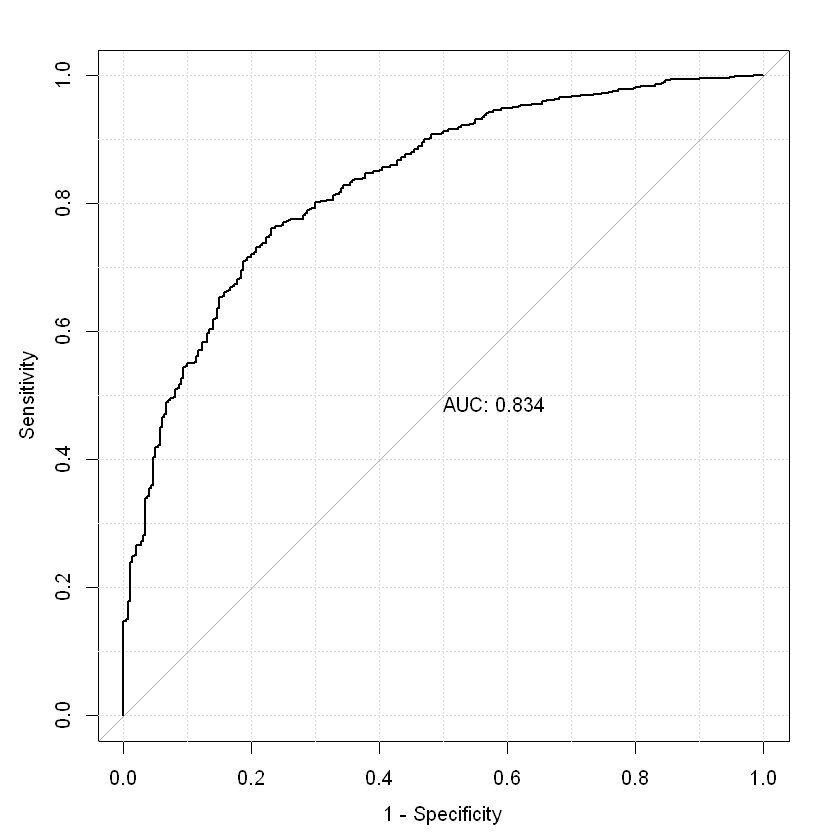

In [15]:
data<-read.csv("germancredit.csv",header=TRUE,sep=",",colClasses=c("factor","factor","numeric","factor","factor","numeric","factor","factor","numeric","factor","factor","numeric","factor","numeric","factor","factor","numeric","factor","numeric","factor","factor"))
str(data)
library(pROC)
### a) Logistic regression with all predictors
fit1<-glm(Default~.,family="binomial",data=data)
lr.prob<-predict(fit1,data, type="response")
lr.pred<-ifelse(lr.prob>=0.5,"1","0")
##Training error rates
1-mean(lr.pred==data[,1])
table(lr.pred,data[,1])
##Sensitivity & Specificity
c(165/(165+135),624/(624+76))
##0.5500000 0.8914286
roc.lr <- roc(data[,1], lr.prob, levels=c("1","0"), plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,print.auc = TRUE)
roc.lr
#plot(roc.lr)

##  Write your own code to estimate the test error rate of the model in (a) using LOOCV.

In [16]:
# b

library(class)
acc3 = NULL
#10-fold validation
set.seed(1)
for(i in 1:nrow(data))
{
dataTest <- data[i, ]
dataTrain <- data[-i, ]
set.seed(1234)
lm.pred<-predict(glm(formula = Default~., family="binomial", data=dataTrain),dataTest,type="response")
mod.test<-ifelse(lm.pred>=0.5,1,0)
misClass_Error <- (dataTest[,1]!=mod.test)
acc3[i] <- misClass_Error
}
mean(acc3)
# 0.249


Warning message:
"package 'class' was built under R version 4.1.2"


[1] 0.249

## Verify your results in (b) using a package. Make sure the two results match.

In [17]:
### c)
library(caret)
model.lr<-train(as.factor(Default)~., data, method="glm", family="binomial",metric="Accuracy",
trControl=trainControl(method = "LOOCV"))
model.lr
##0.249

Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.1.3"


Generalized Linear Model 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy  Kappa    
  0.751     0.3731118


##  Perform an LDA of the data. Provide its error rate, sensitivity, and specificity based on training data. Also draw its ROC curve and present an estimate of AUC based on training data. Estimate the test rate using LOOCV.


Warning message:
"package 'MASS' was built under R version 4.1.3"


[1] 0.223

   
      0   1
  0 615 138
  1  85 162

[1] 0.5400000 0.8785714

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Linear Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy  Kappa   
  0.758     0.390121


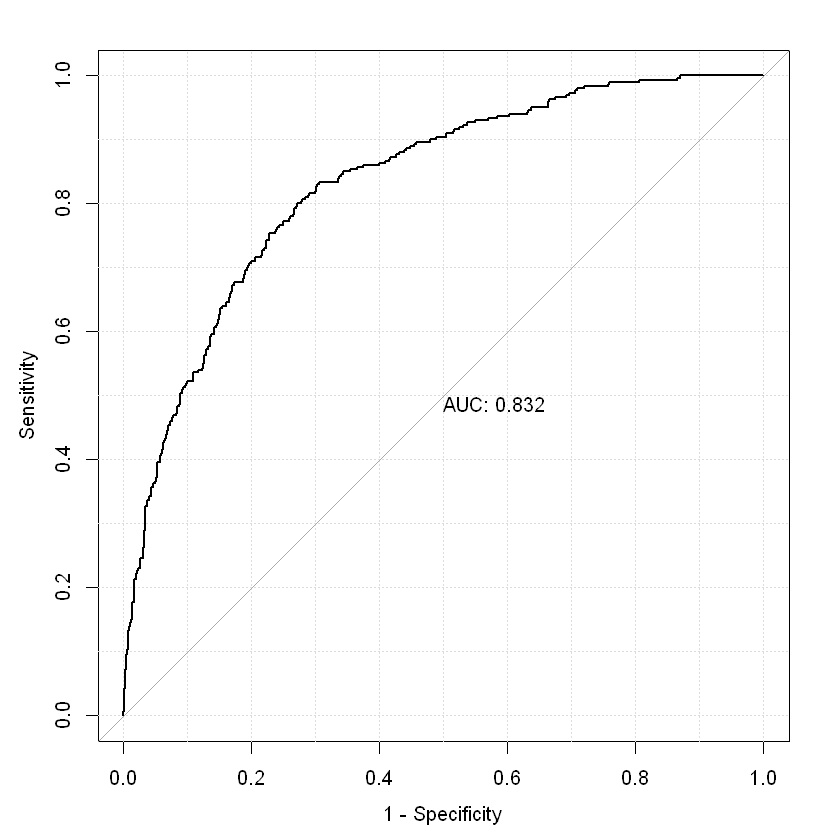

In [18]:
### d)
library(MASS)
#building model
lda.fit <- lda(as.factor(Default)~.,data)
lda.pred<-predict(lda.fit,data)
##Training error rates
1-mean(lda.pred$class==data[,1])
table(lda.pred$class,data[,1])
##Sensitivity & Specificity
c(162/(162+138),615/(615+85))
#roc
roc.lda <- roc(data[,1],lda.pred$posterior[,2], plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,print.auc = TRUE)
#calculate error rate using LOOCV
model_final.lda<-train(as.factor(Default)~., data, method="lda",metric="Accuracy",
trControl=trainControl(method = "LOOCV"))
model_final.lda

##  Repeat (d) using QDA.


[1] 0.177

   
      0   1
  0 593  70
  1 107 230

[1] 0.7666667 0.8471429

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message:
"model fit failed for Fold0204: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group 1
"


Quadratic Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy   Kappa    
  0.7167167  0.3477322


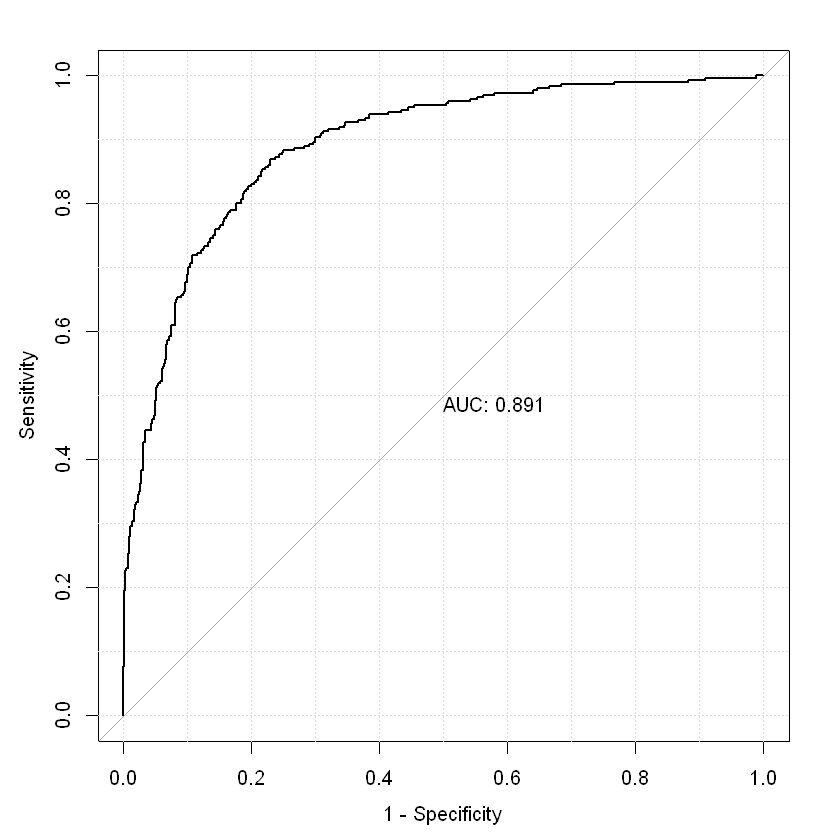

In [57]:
### e)
#building model
qda.fit <- qda(as.factor(Default)~.,data)
qda.pred<-predict(qda.fit,data)
##Training error rates
1-mean(qda.pred$class==data[,1])
table(qda.pred$class,data[,1])
##Sensitivity & Specificity
c(230/(230+70),593/(593+107))
#roc
roc.qda <- roc(data[,1],qda.pred$posterior[,2], plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,print.auc = TRUE)
#calculate error rate using LOOCV
model_final.qda<-train(as.factor(Default)~., data, method="qda",metric="Accuracy",
trControl=trainControl(method = "LOOCV"))
model_final.qda

## Fit a KNN with K chosen optimally using the LOOCV test error rate. Repeat (d) for the optimal KNN

In [59]:
####  f


model.knn<-train(as.factor(Default)~., data,method="knn",trControl=trainControl(method = "LOOCV"),
tuneGrid=expand.grid(k=seq(from=1,to=100,by=1)))
print(model.knn)


k-Nearest Neighbors 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results across tuning parameters:

  k    Accuracy  Kappa       
    1  0.612      0.074427481
    2  0.601      0.045454545
    3  0.617      0.015930113
    4  0.629      0.048717949
    5  0.652      0.064516129
    6  0.668      0.099783080
    7  0.680      0.099099099
    8  0.669      0.077480491
    9  0.688      0.109589041
   10  0.676      0.077448747
   11  0.689      0.086368978
   12  0.685      0.072438163
   13  0.693      0.076413959
   14  0.693      0.085220501
   15  0.704      0.095354523
   16  0.696      0.079903148
   17  0.698      0.074754902
   18  0.692      0.056372549
   19  0.692      0.058679707
   20  0.692      0.060975610
   21  0.698      0.065594059
   22  0.689      0.046012270
   23  0.699      0.069839308
   24  0.704      0.081885856
   25  

   knn.fit
      1   2
  1 692   8
  2 280  20

[1] 0.06666667 0.98857143

Setting direction: controls > cases



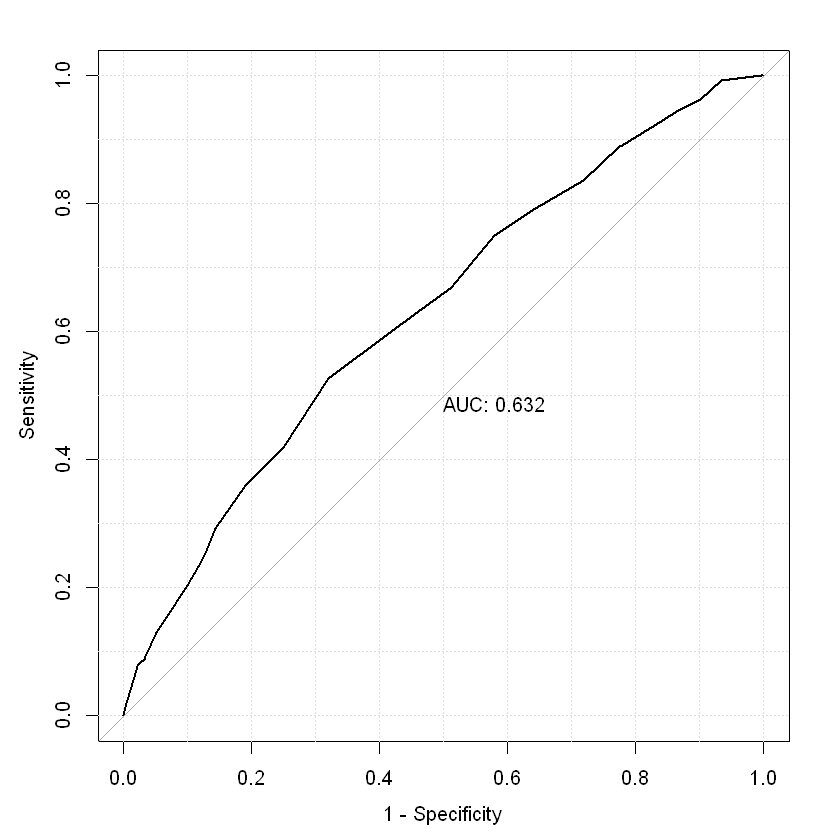

In [71]:
conv.num <- function(x)
{
if(is.numeric(x)){
return(x)
}
return(as.numeric(x))
}
new.data<- sapply(data,conv.num)
knn.fit<-knn(new.data[,-1],new.data[,-1],new.data[,1],k=77,prob=T)
table(new.data[,1],knn.fit)
##Sensitivity & Specificity
c(20/(20+280),692/(692+8))
roc.knn<- roc(data[,1],attr(knn.fit,"prob"),levels=c(0,1), plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,print.auc = TRUE)

##  Repeat (d) for the logistic regression model you proposed in #1.


[1] 0.213

           
lr.pred.red   0   1
          0 627 140
          1  73 160

[1] 0.5333333 0.8957143

Setting direction: controls > cases



Generalized Linear Model 

1000 samples
  11 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy  Kappa   
  0.761     0.388434


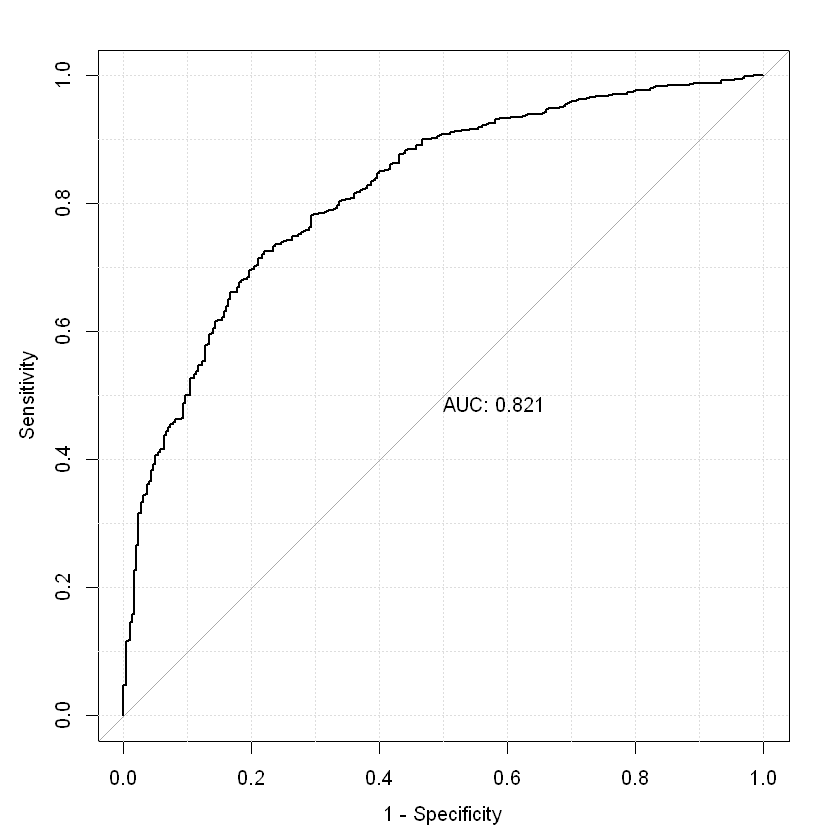

In [73]:
#### g)
fit.red<-glm(Default~checkingstatus1+history+purpose+savings+status+others
+otherplans+housing+foreign+duration+amount,family="binomial",data=data)
lr.prob.red<-predict(fit.red,data, type="response")
lr.pred.red<-ifelse(lr.prob.red>=0.5,"1","0")
##Training error rates
1-mean(lr.pred.red==data[,1])
table(lr.pred.red,data[,1])
##Sensitivity & Specificity
c(160/(160+140),627/(627+73))
roc.lr.red <- roc(data[,1], lr.prob.red, levels=c("1","0"), plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,print.auc = TRUE)

model_final.lr<-train(Default~checkingstatus1+history+purpose+savings+status+others
+otherplans+housing+foreign+duration+amount, data, method="glm", family="binomial",metric="Accuracy",
trControl=trainControl(method = "LOOCV"))
model_final.lr

## Compare the results from various classifiers. Which classifier would you recommend? Justify your answer.

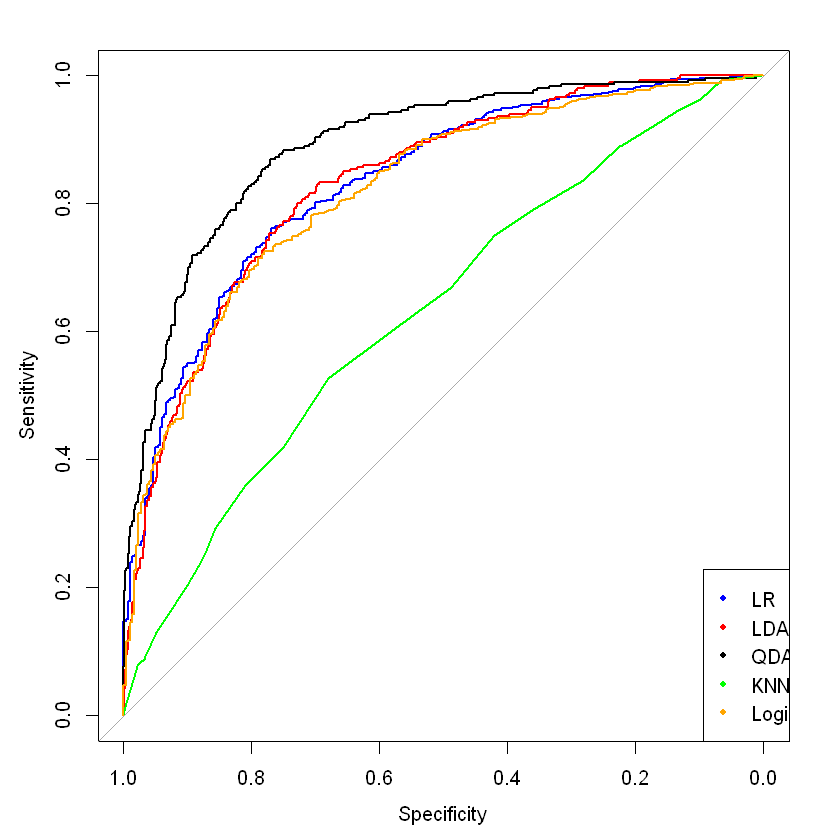

In [80]:
##plotting ROC curves

par(mfrow=c(1,1))
plot(roc.lr, col="BLUE")
plot(roc.lda,add=T, col="RED")
plot(roc.qda,add=T, col="BLACK")
plot(roc.knn,add=T, col="GREEN")
plot(roc.lr.red,add=T, col="ORANGE")

legend("bottomright", pch = c(20, 20), legend = c("LR","LDA", "QDA", "KNN","Logistic"),col = c("blue","red", "black","green","orange"))

In [15]:
## Problem 2 ##\\

library(class)
library(caret)
library(e1071)
library(pROC)
library(MASS)

data_ger = read.csv("germancredit.csv", header = T)
str(data_ger)


#building model by using all predictors
fit_1 = glm(Default~.,family="binomial", data = data_ger)
fit_1
lr.prob = predict(fit_1,data_ger, type="response")
lr.prob
lr.pred = ifelse(lr.prob >= 0.5,"1","0")
lr.pred


'data.frame':	1000 obs. of  21 variables:
 $ Default        : int  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : chr  "A93" "A92" "A93" "A93" ...
 $ others         : chr  "A101" "A101" "A101" "A103" ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : chr  "A121" "A121" "A121" "A122" ...
 $ age            : int  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ housing        : chr  "A152" "A152" "A152" "A153" ...
 $ cards          : int  2 1 1 1 2 1 1 1 1 2 ...
 $ job            : 


Call:  glm(formula = Default ~ ., family = "binomial", data = data_ger)

Coefficients:
       (Intercept)  checkingstatus1A12  checkingstatus1A13  checkingstatus1A14  
         0.4005027          -0.3748534          -0.9656768          -1.7118880  
          duration          historyA31          historyA32          historyA33  
         0.0278633           0.1433777          -0.5861136          -0.8531614  
        historyA34          purposeA41         purposeA410          purposeA42  
        -1.4357716          -1.6664670          -1.4887859          -0.7916104  
        purposeA43          purposeA44          purposeA45          purposeA46  
        -0.8915834          -0.5227827          -0.2163959           0.0362838  
        purposeA48          purposeA49              amount          savingsA62  
        -2.0594328          -0.7400868           0.0001283          -0.3577406  
        savingsA63          savingsA64          savingsA65           employA72  
        -0.3760729   

1            2            3            4            5            6 
0.0352316832 0.6322624134 0.0280624017 0.2518021300 0.7520011183 0.2623355977 
           7            8            9           10           11           12 
0.0689096590 0.2877990302 0.0114643353 0.7399861327 0.7045324117 0.8817471563 
          13           14           15           16           17           18 
0.1878806803 0.4040597776 0.7039092674 0.4955465337 0.0272688555 0.8021398065 
          19           20           21           22           23           24 
0.5769096458 0.0802303773 0.1053066923 0.2313508351 0.1058012618 0.0431573889 
          25           26           27           28           29           30 
0.0058912235 0.1843592345 0.1577855181 0.1662111549 0.0818392189 0.7428636149 
          31           32           33           34           35           36 
0.1827767063 0.5509983654 0.4350368565 0.0334979564 0.4103955201 0.5451054278 
          37           38           39           40           41           42 
0.2980247072 0.3733026414 0.0989229798 0.2397435353 0.1882059072 0.2660249477 
          43           44           45           46           47           48 
0.3190486701 0.1523966855 0.6539305042 0.2008911329 0.1201251856 0.0923038679 
          49           50           51           52           53           54 
0.1003223889 0.1618733630 0.3403492323 0.1117726878 0.0787636884 0.0124020827 
          55           56           57           58           59           60 
0.7289569722 0.0434319756 0.1436928170 0.3415295900 0.4590996813 0.9005291392 
          61           62           63           64           65           66 
0.3098286154 0.0160110862 0.5039329599 0.8424177961 0.2478336475 0.2631565319 
          67           68           69           70           71           72 
0.1934070294 0.2730577436 0.4732210420 0.1529353290 0.2417599881 0.0171558031 
          73           74           75           76           77           78 
0.1575029634 0.4128186362 0.5455524812 0.1001415513 0.6803143248 0.0973736581 
          79           80           81           82           83           84 
0.1712852784 0.5422787313 0.0582136643 0.0740062690 0.2006192829 0.1060323647 
          85           86           87           88           89           90 
0.2045897235 0.0265468466 0.4040216398 0.7031750503 0.3974005785 0.5534944891 
          91           92           93           94           95           96 
0.0220786549 0.0613381505 0.0647347870 0.3171723207 0.0968359882 0.9523216179 
          97           98           99          100          101          102 
0.0284077568 0.3147472330 0.2185989825 0.1673186618 0.2948958849 0.4581523419 
         103          104          105          106          107          108 
0.0707517276 0.1009897641 0.0251942646 0.3107670234 0.6729187855 0.3333916767 
         109          110          111          112          113          114 
0.1078550640 0.0982378171 0.3587608321 0.6088731547 0.5302500899 0.5667172772 
         115          116          117          118          119          120 
0.2574463611 0.0282432490 0.4205744859 0.0744179562 0.3296870671 0.1574639917 
         121          122          123          124          125          126 
0.4737868524 0.0737567726 0.1141181008 0.1385586600 0.3762670004 0.5052819754 
         127          128          129          130          131          132 
0.3842856621 0.4330187579 0.0838511139 0.6405079344 0.4998342081 0.8688074476 
         133          134          135          136          137          138 
0.2071880170 0.2961795138 0.2306373719 0.0199780177 0.0274759850 0.1154605587 
         139          140          141          142          143          144 
0.0325133596 0.1716090263 0.0129389860 0.7445069889 0.4607220407 0.3514259312 
         145          146          147          148          149          150 
0.1176974654 0.5766127002 0.3050188187 0.0461761479 0.2759773282 0.0143830903 
         151          152          153          154          

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 "0"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1"  "1"  "1"  "0"  "0"  "1"  "0" 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 "0"  "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1" 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0" 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "1"  "1" 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "1" 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1" 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1" 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
 "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
 "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0" 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
 "0"  "0"  "0"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0" 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
 "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1" 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
 "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0" 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
 "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "1"  "0"  "0" 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
 "0"  "1"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0" 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
 "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0" 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0" 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
 "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0" 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
 "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0" 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
 "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0" 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
 "0"  "1"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0" 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
 "0"  "1"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1" 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
 "1"  "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0"  "1"  "0"  "0"  "1"  "0"  "0" 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"

In [16]:
# Training error rates
mean(lr.pred != data_ger[ ,1])
table(lr.pred, data_ger[ ,1])

expected_value <- as.factor(data_ger$Default)
predicted_value <- as.factor(lr.pred)


[1] 0.214

       
lr.pred   0   1
      0 626 140
      1  74 160

In [17]:
#Creating confusion matrix
result_lr <- confusionMatrix(data=predicted_value, reference = expected_value)

#Display results 
result_lr

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 626 140
         1  74 160
                                         
               Accuracy : 0.786          
                 95% CI : (0.7593, 0.811)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 5.727e-10      
                                         
                  Kappa : 0.4563         
                                         
 Mcnemar's Test P-Value : 8.859e-06      
                                         
            Sensitivity : 0.8943         
            Specificity : 0.5333         
         Pos Pred Value : 0.8172         
         Neg Pred Value : 0.6838         
             Prevalence : 0.7000         
         Detection Rate : 0.6260         
   Detection Prevalence : 0.7660         
      Balanced Accuracy : 0.7138         
                                         
       'Positive' Class : 0              
                                         

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data_ger$Default, predictor = as.vector(fitted.values(fit)),     percent = F, ci = TRUE, plot = TRUE, boot.n = 1000, ci.alpha = 0.9,     stratified = FALSE, grid = TRUE, show.thres = TRUE, legacy.axes = TRUE,     reuse.auc = TRUE, print.auc = TRUE, print.thres.col = "blue",     ci.type = "bars", print.thres.cex = 0.7, main = paste("ROC curve using",         "(N = ", nrow(data_ger), ")"))

Data: as.vector(fitted.values(fit)) in 700 controls (data_ger$Default 0) < 300 cases (data_ger$Default 1).
Area under the curve: 0.8338
95% CI: 0.8073-0.8603 (DeLong)

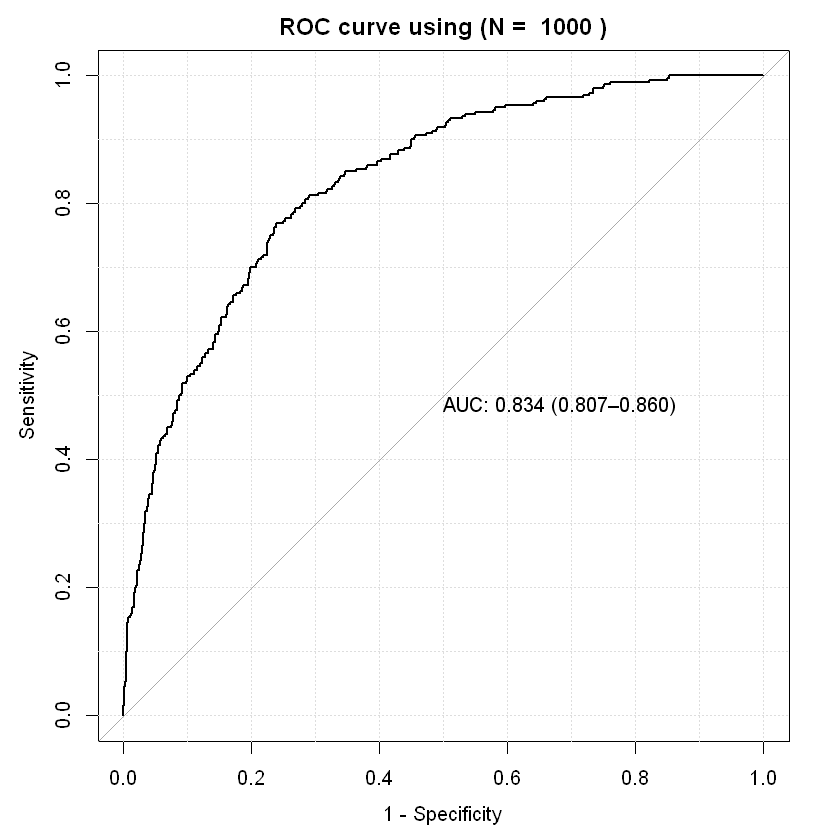

In [18]:
#ROC Curve

fit <- glm(Default ~ . , data = data_ger, family = binomial)

roc(data_ger$Default, as.vector(fitted.values(fit)), percent=F,   boot.n=1000, ci.alpha=0.9, stratified=FALSE, plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,
    # print.thres = c(0.30,0.35, 0.40, 0.45,0.48, 0.50,0.55, 0.60),#
    print.auc = TRUE, print.thres.col = "blue", ci=TRUE, ci.type="bars", print.thres.cex = 0.7, main = paste("ROC curve using","(N = ",nrow(data_ger),")") )




In [19]:

# (b)

s = NULL
err = NULL
set.seed(1)
for(i in 1:nrow(data_ger))
{
  dataTest = data_ger[i, ]
  dataTrain = data_ger[-i, ]
  lm.pred = predict(glm(formula = Default~., family="binomial", data=dataTrain),dataTest,type="response")
  mod.test = ifelse(lm.pred >= 0.5, "1", "0")
  misClass_Error = (dataTest[,1] != mod.test)
  err[i] = misClass_Error
}
mean(err)


[1] 0.249

In [20]:
# (c)
model.lr = train(as.factor(Default)~., data_ger, method="glm", family="binomial", metric="Accuracy",
                 trControl=trainControl(method = "LOOCV"))
error.rate = 1 - model.lr$results[2]
error.rate


,Accuracy
,<dbl>
1,0.249


In [21]:
# (d)

# Performing LDA on training data

lda3_fit = lda(Default ~ . , data=data_ger)
lda3_fit
lda3.pred = predict(lda3_fit, data_ger, type = "response")
names(lda3.pred)
mean(lda3.pred$class != data_ger[ ,1])
table(lda3.pred$class, data_ger[ ,1])


Call:
lda(Default ~ ., data = data_ger)

Prior probabilities of groups:
  0   1 
0.7 0.3 

Group means:
  checkingstatus1A12 checkingstatus1A13 checkingstatus1A14 duration historyA31
0          0.2342857         0.07000000          0.4971429 19.20714 0.03000000
1          0.3500000         0.04666667          0.1533333 24.86000 0.09333333
  historyA32 historyA33 historyA34 purposeA41 purposeA410 purposeA42 purposeA43
0  0.5157143 0.08571429  0.3471429 0.12285714  0.01000000  0.1757143  0.3114286
1  0.5633333 0.09333333  0.1666667 0.05666667  0.01666667  0.1933333  0.2066667
  purposeA44 purposeA45 purposeA46  purposeA48 purposeA49   amount savingsA62
0 0.01142857 0.02000000 0.04000000 0.011428571  0.0900000 2985.457 0.09857143
1 0.01333333 0.02666667 0.07333333 0.003333333  0.1133333 3938.127 0.11333333
  savingsA63 savingsA64 savingsA65 employA72 employA73 employA74 employA75
0 0.07428571       0.06  0.2157143 0.1457143 0.3357143 0.1928571 0.2700000
1 0.03666667       0.02  0.1066667 

[1] "class"     "posterior" "x"

[1] 0.223

   
      0   1
  0 615 138
  1  85 162

In [22]:

# Test Error Rate
model.lda = train(as.factor(Default)~., data_ger, method="lda", metric="Accuracy",
                  trControl=trainControl(method = "LOOCV"))
model.lda
1-0.758

Linear Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy  Kappa   
  0.758     0.390121


[1] 0.242

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:xts':

    first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ROCR' was built under R version 4.1.2"
Warning message:
"package 'gplots' was built under R version 4.1.2"

Attaching package: 'gplots'


The following object is masked from 'package:PerformanceAnalytics':

    textplot


The following object is masked from 'package:stats':

    lowess


Warning message:
"package 'KernSmooth' was built under R version 4.1.2"
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



null device 
          1

[1] 0.8322143

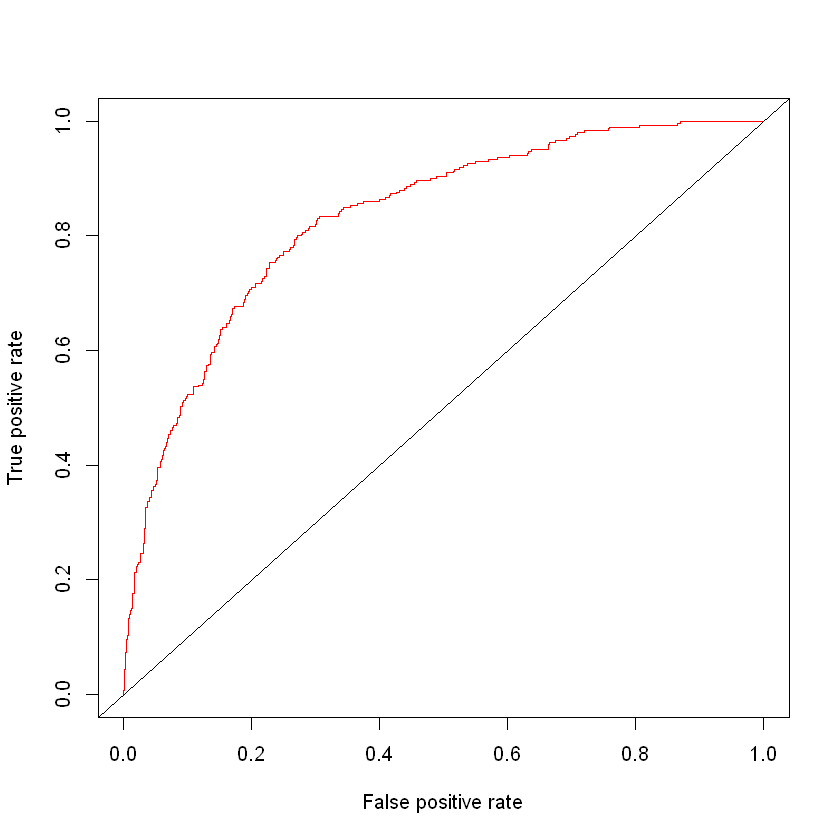

In [23]:
# ROC of LDA


library(dplyr)
library(ROCR)
library(gplots)
library(KernSmooth)

pred_l <- prediction(lda3.pred$posterior[,2], data_ger$Default) 
perf_l <- performance(pred_l,"tpr","fpr")


plot(perf_l,colorize=FALSE, col = "red")
abline(a=0,b=1)
dev.off()
auc<- performance(pred_l,"auc")
auc@y.values[[1]]


In [24]:
# (e)

# QDA

qda3_fit = qda(Default ~ . , data=data_ger)
qda3_fit
qda3.pred = predict(qda3_fit, data_ger, type = "response")
names(qda3.pred)
mean(qda3.pred$class != data_ger[ ,1])
table(qda3.pred$class, data_ger[ ,1])

Call:
qda(Default ~ ., data = data_ger)

Prior probabilities of groups:
  0   1 
0.7 0.3 

Group means:
  checkingstatus1A12 checkingstatus1A13 checkingstatus1A14 duration historyA31
0          0.2342857         0.07000000          0.4971429 19.20714 0.03000000
1          0.3500000         0.04666667          0.1533333 24.86000 0.09333333
  historyA32 historyA33 historyA34 purposeA41 purposeA410 purposeA42 purposeA43
0  0.5157143 0.08571429  0.3471429 0.12285714  0.01000000  0.1757143  0.3114286
1  0.5633333 0.09333333  0.1666667 0.05666667  0.01666667  0.1933333  0.2066667
  purposeA44 purposeA45 purposeA46  purposeA48 purposeA49   amount savingsA62
0 0.01142857 0.02000000 0.04000000 0.011428571  0.0900000 2985.457 0.09857143
1 0.01333333 0.02666667 0.07333333 0.003333333  0.1133333 3938.127 0.11333333
  savingsA63 savingsA64 savingsA65 employA72 employA73 employA74 employA75
0 0.07428571       0.06  0.2157143 0.1457143 0.3357143 0.1928571 0.2700000
1 0.03666667       0.02  0.1066667 

[1] "class"     "posterior"

[1] 0.177

   
      0   1
  0 593  70
  1 107 230

[1] 0.8906714

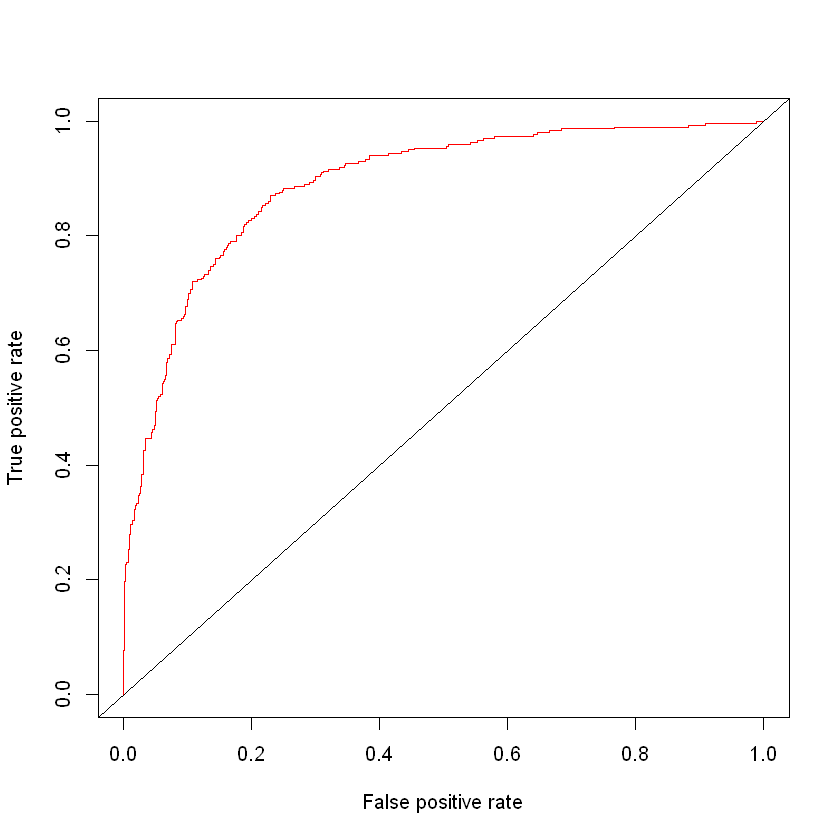

In [26]:
# ROC QDA

pred_qda <- prediction(qda3.pred$posterior[,2], data_ger$Default)
perf_q <- performance(pred_qda,"tpr","fpr")


plot(perf_q,colorize=FALSE, col = "red")
abline(a=0,b=1)

auc_qda<- performance(pred_qda,"auc")
auc_qda@y.values[[1]]


In [27]:
# Test Error Rate
model.qda = train(as.factor(Default)~., data_ger, method="qda", metric="Accuracy",
                  trControl=trainControl(method = "LOOCV"))
model.qda
1 - 0.7167167


Warning message:
"model fit failed for Fold0204: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group 1
"


Quadratic Discriminant Analysis 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results:

  Accuracy   Kappa    
  0.7167167  0.3477322


[1] 0.2832833

In [28]:
# (f)

#  KNN


# The final value used for the model was k = 9.

# Converting all predictors as numeric

library(CatEncoders)

t <- function(x) {
  # check if x is numeric
  if(is.numeric(x)) {
    return (x)
  }
  l <- LabelEncoder.fit(x)
  y <- transform(l, x)
  return (y)
}

data_knn <- sapply(data_ger, t)
data_knn1 <- data_knn[,-1]
t_y <- data_ger$Default
pred_knn1 = knn(train = data_knn1, test = data_knn1, cl = t_y, k = 9, prob = TRUE)
pred_knn1
expected_value_k1 <- as.factor(t_y)
predicted_value_k1 <- as.factor(pred_knn1)
#Creating confusion matrix
result_knn1 <- confusionMatrix(data=predicted_value_k1, reference = expected_value_k1)
#Display results 
result_knn1


Warning message:
"package 'CatEncoders' was built under R version 4.1.2"

Attaching package: 'CatEncoders'


The following object is masked from 'package:base':

    transform




[1] 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
  [75] 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 [297] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [556] 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 [667] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1
 [741] 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 [778] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [889] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 [926] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
[1000] 0
attr(,"prob")
   [1] 0.8888889 0.6666667 0.8888889 0.5555556 0.5555556 0.6666667 0.7777778
   [8] 0.5555556 0.8888889 0.6666667 0.6666667 0.6666667 1.0000000 0.5555556
  [15] 1.0000000 0.6666667 0.6666667 0.5555556 0.6666667 0.6666667 1.0000000
  [22] 0.7777778 0.7777778 0.7777778 0.7777778 0.6666667 0.6666667 0.6666667
  [29] 0.6666667 0.6666667 0.6666667 0.7777778 0.7777778 0.7777778 0.7777778
  [36] 0.7777778 0.6666667 0.8888889 0.6666667 0.6666667 0.7777778 0.8888889
  [43] 0.5555556 0.5555556 0.6666667 0.8888889 0.5555556 0.5555556 0.5555556
  [50] 0.7777778 0.7777778 0.6666667 0.5555556 0.6666667 0.6666667 0.6666667
  [57] 0.5555556 0.5555556 0.7777778 0.5555556 0.8888889 0.6666667 0.6666667
  [64] 0.6666667 0.7777778 0.6666667 0.6666667 0.7777778 0.6666667 0.6666667
  [71] 0.6666667 0.6666667 1.0000000 0.6666667 0.6666667 0.6666667 0.6666667
  [78] 0.6666667 0.5555556 0.7777778 0.6666667 0.5555556 0.8888889 0.8888889
  [85] 0.6666667 1.0000000 0.7000000 0.6666667 0.7777778 0.6666667 0.6666667
  [92] 1.0000000 0.6666667 0.8888889 0.8888889 0.7777778 1.0000000 0.7777778
  [99] 0.8888889 0.5555556 1.0000000 0.6666667 0.5555556 0.6666667 0.6666667
 [106] 0.6666667 0.5555556 0.6666667 0.7777778 1.0000000 0.7777778 0.7777778
 [113] 0.6666667 0.5555556 0.6666667 1.0000000 0.5555556 0.8888889 0.6666667
 [120] 0.7777778 0.5555556 0.8888889 0.8888889 0.5555556 0.5555556 0.8888889
 [127] 0.6666667 0.6666667 0.8000000 0.8888889 0.5555556 0.6666667 0.7777778
 [134] 0.6666667 0.6666667 0.6666667 0.6666667 0.7777778 0.6666667 0.7777778
 [141] 0.6666667 0.5555556 0.5555556 0.6666667 0.6666667 0.8888889 0.6666667
 [148] 0.6666667 0.7777778 1.0000000 0.6666667 0.6666667 0.7777778 0.5555556
 [155] 0.5555556 0.5555556 0.7777778 1.0000000 0.8888889 1.0000000 0.8888889
 [162] 0.7777778 0.666

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 657 220
         1  43  80
                                          
               Accuracy : 0.737           
                 95% CI : (0.7085, 0.7641)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.005458        
                                          
                  Kappa : 0.2468          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9386          
            Specificity : 0.2667          
         Pos Pred Value : 0.7491          
         Neg Pred Value : 0.6504          
             Prevalence : 0.7000          
         Detection Rate : 0.6570          
   Detection Prevalence : 0.8770          
      Balanced Accuracy : 0.6026          
                                          
       'Positive' Class : 0               
                              

[1] 0.8888889 0.6666667 0.8888889 0.5555556 0.5555556 0.6666667 0.7777778
   [8] 0.5555556 0.8888889 0.6666667 0.6666667 0.6666667 1.0000000 0.5555556
  [15] 1.0000000 0.6666667 0.6666667 0.5555556 0.6666667 0.6666667 1.0000000
  [22] 0.7777778 0.7777778 0.7777778 0.7777778 0.6666667 0.6666667 0.6666667
  [29] 0.6666667 0.6666667 0.6666667 0.7777778 0.7777778 0.7777778 0.7777778
  [36] 0.7777778 0.6666667 0.8888889 0.6666667 0.6666667 0.7777778 0.8888889
  [43] 0.5555556 0.5555556 0.6666667 0.8888889 0.5555556 0.5555556 0.5555556
  [50] 0.7777778 0.7777778 0.6666667 0.5555556 0.6666667 0.6666667 0.6666667
  [57] 0.5555556 0.5555556 0.7777778 0.5555556 0.8888889 0.6666667 0.6666667
  [64] 0.6666667 0.7777778 0.6666667 0.6666667 0.7777778 0.6666667 0.6666667
  [71] 0.6666667 0.6666667 1.0000000 0.6666667 0.6666667 0.6666667 0.6666667
  [78] 0.6666667 0.5555556 0.7777778 0.6666667 0.5555556 0.8888889 0.8888889
  [85] 0.6666667 1.0000000 0.7000000 0.6666667 0.7777778 0.6666667 0.6666667
  [92] 1.0000000 0.6666667 0.8888889 0.8888889 0.7777778 1.0000000 0.7777778
  [99] 0.8888889 0.5555556 1.0000000 0.6666667 0.5555556 0.6666667 0.6666667
 [106] 0.6666667 0.5555556 0.6666667 0.7777778 1.0000000 0.7777778 0.7777778
 [113] 0.6666667 0.5555556 0.6666667 1.0000000 0.5555556 0.8888889 0.6666667
 [120] 0.7777778 0.5555556 0.8888889 0.8888889 0.5555556 0.5555556 0.8888889
 [127] 0.6666667 0.6666667 0.8000000 0.8888889 0.5555556 0.6666667 0.7777778
 [134] 0.6666667 0.6666667 0.6666667 0.6666667 0.7777778 0.6666667 0.7777778
 [141] 0.6666667 0.5555556 0.5555556 0.6666667 0.6666667 0.8888889 0.6666667
 [148] 0.6666667 0.7777778 1.0000000 0.6666667 0.6666667 0.7777778 0.5555556
 [155] 0.5555556 0.5555556 0.7777778 1.0000000 0.8888889 1.0000000 0.8888889
 [162] 0.7777778 0.6666667 0.7777778 0.5555556 0.7777778 0.5555556 1.0000000
 [169] 0.6666667 0.5555556 0.6666667 0.5555556 0.6666667 0.8888889 0.6666667
 [176] 0.6666667 0.5555556 1.0000000 0.7777778 0.8888889 0.5555556 0.7777778
 [183] 0.6666667 0.8888889 0.5555556 0.5555556 0.6666667 0.6666667 0.5555556
 [190] 0.7777778 0.5555556 0.7777778 0.6666667 0.7777778 0.6666667 0.8888889
 [197] 0.6666667 0.5555556 0.6666667 0.6666667 0.5555556 0.8888889 0.6666667
 [204] 0.5555556 0.7777778 0.6666667 0.5555556 0.7777778 0.6666667 1.0000000
 [211] 0.8888889 0.7777778 0.6666667 0.6666667 0.6666667 0.6666667 0.5555556
 [218] 0.6666667 0.7777778 0.8888889 0.6666667 0.5555556 0.6666667 0.7777778
 [225] 0.6666667 0.7777778 0.6666667 0.5555556 0.7777778 0.6666667 0.5555556
 [232] 0.7777778 0.8888889 0.7777778 0.7777778 0.6666667 0.6666667 0.7777778
 [239] 0.8888889 0.7777778 0.5555556 1.0000000 0.5555556 0.6666667 0.6666667
 [246] 0.5555556 0.7777778 0.7777778 0.5555556 0.6666667 0.7777778 0.7777778
 [253] 0.5555556 0.5555556 0.7777778 0.7777778 0.8888889 0.6666667 0.7777778
 [260] 1.0000000 0.6666667 1.0000000 0.6666667 0.7777778 0.7777778 0.6666667
 [267] 0.6666667 0.6666667 0.6666667 0.7777778 0.8888889 1.0000000 0.6666667
 [274] 0.5555556 0.6666667 0.8888889 0.6666667 0.6666667 0.5555556 0.7777778
 [281] 0.5555556 0.7777778 0.7777778 0.7777778 0.8888889 0.6666667 0.5555556
 [288] 0.6666667 0.7777778 0.7777778 0.7777778 0.5555556 0.5555556 0.5555556
 [295] 0.6666667 0.5555556 0.6666667 0.6666667 0.7777778 0.7777778 0.5555556
 [302] 0.7777778 0.6666667 0.6666667 0.6666667 0.7777778 0.5555556 0.5555556
 [309] 0.6666667 1.0000000 0.8888889 0.8888889 0.8888889 0.5555556 0.6666667
 [316] 0.8888889 0.7777778 0.5555556 0.6666667 0.8888889 0.6666667 0.5555556
 [323] 1.0000000 0.8888889 0.7777778 0.6666667 1.0000000 0.6666667 0.7777778
 [330] 0.8888889 0.7777778 0.7777778 0.7777778 0.6666667 0.5555556 0.6666667
 [337] 0.7777778 0.5555556 0.5555556 0.6666667 1.0000000 0.8888889 0.7777778
 [344] 0.6666667 0.6666667 1.0000000 0.5555556 0.8888889 1.0000000 0.6666667
 [351] 0.7000000 0.5555556 0.7777778 0.5555556 0.6666667 0.5555556 0.8888889
 [358] 0.7777778 0.6666667 0.6666667 0.7777778 0.6666667 0.7777778 0.8888889

[1] 0.2883905

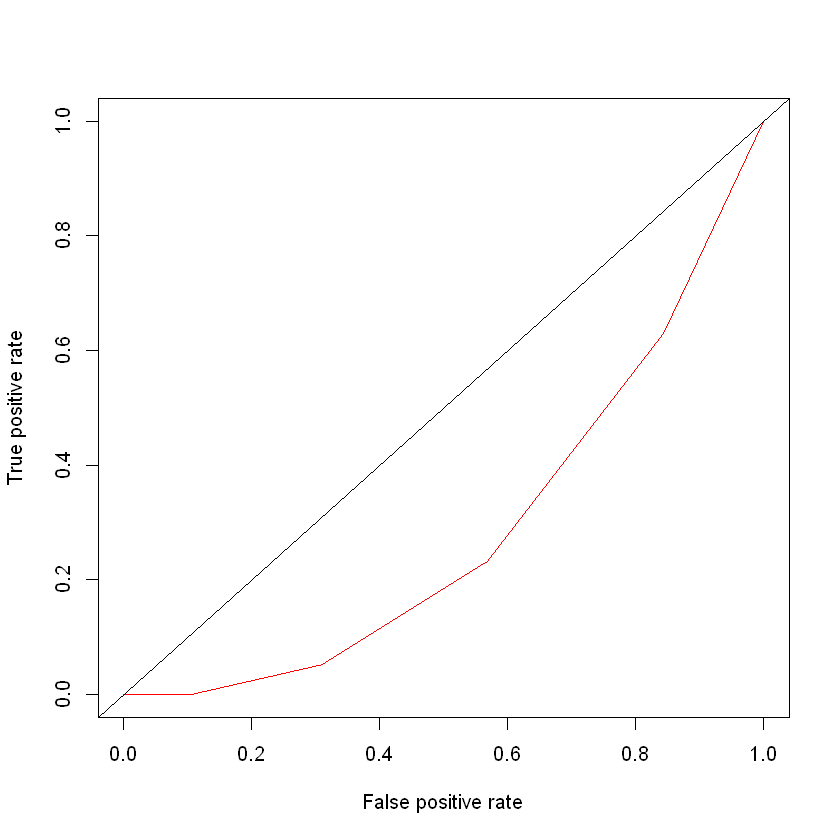

In [29]:
# ROC curve for knn
prob_knn1 <- attr(pred_knn1, "prob")
prob_knn1
pred_knn11 <- prediction(prob_knn1, t_y)
pred1_knn1 <- performance(pred_knn11, "tpr", "fpr")
plot(pred1_knn1,colorize=FALSE, col = "red")
abline(a=0,b=1)



auc_knn1<- performance(pred_knn11,"auc")
auc_knn1@y.values[[1]]


In [30]:
# Test Error Rate for KNN
model.knn = train(as.factor(Default)~., data_ger, method="knn", metric="Accuracy",
                  trControl=trainControl(method = "LOOCV"))
model.knn
1- 0.688



k-Nearest Neighbors 

1000 samples
  20 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 999, 999, 999, 999, 999, 999, ... 
Resampling results across tuning parameters:

  k  Accuracy  Kappa     
  5  0.652     0.06451613
  7  0.680     0.09909910
  9  0.687     0.10775371

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

[1] 0.312

In [31]:
# (g)

# Logistic Regression

#building model by using all predictors
fit_lr = glm(Default~.,family="binomial", data = data_ger)
fit_lr
lr.prob = predict(fit_lr,data_ger, type="response")
lr.prob
lr.pred = ifelse(lr.prob >= 0.5,"1","0")
lr.pred
# Training error rates
mean(lr.pred != data_ger[ ,1])
table(lr.pred, data_ger[ ,1])

expected_value <- as.factor(data_ger$Default)
predicted_value_lr1 <- as.factor(lr.pred)



Call:  glm(formula = Default ~ ., family = "binomial", data = data_ger)

Coefficients:
       (Intercept)  checkingstatus1A12  checkingstatus1A13  checkingstatus1A14  
         0.4005027          -0.3748534          -0.9656768          -1.7118880  
          duration          historyA31          historyA32          historyA33  
         0.0278633           0.1433777          -0.5861136          -0.8531614  
        historyA34          purposeA41         purposeA410          purposeA42  
        -1.4357716          -1.6664670          -1.4887859          -0.7916104  
        purposeA43          purposeA44          purposeA45          purposeA46  
        -0.8915834          -0.5227827          -0.2163959           0.0362838  
        purposeA48          purposeA49              amount          savingsA62  
        -2.0594328          -0.7400868           0.0001283          -0.3577406  
        savingsA63          savingsA64          savingsA65           employA72  
        -0.3760729   

1            2            3            4            5            6 
0.0352316832 0.6322624134 0.0280624017 0.2518021300 0.7520011183 0.2623355977 
           7            8            9           10           11           12 
0.0689096590 0.2877990302 0.0114643353 0.7399861327 0.7045324117 0.8817471563 
          13           14           15           16           17           18 
0.1878806803 0.4040597776 0.7039092674 0.4955465337 0.0272688555 0.8021398065 
          19           20           21           22           23           24 
0.5769096458 0.0802303773 0.1053066923 0.2313508351 0.1058012618 0.0431573889 
          25           26           27           28           29           30 
0.0058912235 0.1843592345 0.1577855181 0.1662111549 0.0818392189 0.7428636149 
          31           32           33           34           35           36 
0.1827767063 0.5509983654 0.4350368565 0.0334979564 0.4103955201 0.5451054278 
          37           38           39           40           41           42 
0.2980247072 0.3733026414 0.0989229798 0.2397435353 0.1882059072 0.2660249477 
          43           44           45           46           47           48 
0.3190486701 0.1523966855 0.6539305042 0.2008911329 0.1201251856 0.0923038679 
          49           50           51           52           53           54 
0.1003223889 0.1618733630 0.3403492323 0.1117726878 0.0787636884 0.0124020827 
          55           56           57           58           59           60 
0.7289569722 0.0434319756 0.1436928170 0.3415295900 0.4590996813 0.9005291392 
          61           62           63           64           65           66 
0.3098286154 0.0160110862 0.5039329599 0.8424177961 0.2478336475 0.2631565319 
          67           68           69           70           71           72 
0.1934070294 0.2730577436 0.4732210420 0.1529353290 0.2417599881 0.0171558031 
          73           74           75           76           77           78 
0.1575029634 0.4128186362 0.5455524812 0.1001415513 0.6803143248 0.0973736581 
          79           80           81           82           83           84 
0.1712852784 0.5422787313 0.0582136643 0.0740062690 0.2006192829 0.1060323647 
          85           86           87           88           89           90 
0.2045897235 0.0265468466 0.4040216398 0.7031750503 0.3974005785 0.5534944891 
          91           92           93           94           95           96 
0.0220786549 0.0613381505 0.0647347870 0.3171723207 0.0968359882 0.9523216179 
          97           98           99          100          101          102 
0.0284077568 0.3147472330 0.2185989825 0.1673186618 0.2948958849 0.4581523419 
         103          104          105          106          107          108 
0.0707517276 0.1009897641 0.0251942646 0.3107670234 0.6729187855 0.3333916767 
         109          110          111          112          113          114 
0.1078550640 0.0982378171 0.3587608321 0.6088731547 0.5302500899 0.5667172772 
         115          116          117          118          119          120 
0.2574463611 0.0282432490 0.4205744859 0.0744179562 0.3296870671 0.1574639917 
         121          122          123          124          125          126 
0.4737868524 0.0737567726 0.1141181008 0.1385586600 0.3762670004 0.5052819754 
         127          128          129          130          131          132 
0.3842856621 0.4330187579 0.0838511139 0.6405079344 0.4998342081 0.8688074476 
         133          134          135          136          137          138 
0.2071880170 0.2961795138 0.2306373719 0.0199780177 0.0274759850 0.1154605587 
         139          140          141          142          143          144 
0.0325133596 0.1716090263 0.0129389860 0.7445069889 0.4607220407 0.3514259312 
         145          146          147          148          149          150 
0.1176974654 0.5766127002 0.3050188187 0.0461761479 0.2759773282 0.0143830903 
         151          152          153          154          

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 "0"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1"  "1"  "1"  "0"  "0"  "1"  "0" 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 "0"  "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1" 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0" 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "1"  "1" 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "1" 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1" 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "1" 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
 "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
 "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0" 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
 "0"  "0"  "0"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0" 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
 "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1" 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
 "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0" 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
 "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0"  "1"  "0"  "0" 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
 "0"  "1"  "1"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0"  "0" 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
 "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0" 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0" 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
 "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0" 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
 "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0" 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
 "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0" 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
 "1"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1"  "0"  "1"  "0" 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
 "0"  "1"  "1"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "0" 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
 "0"  "1"  "0"  "1"  "0"  "0"  "0"  "1"  "0"  "0"  "0"  "0"  "0"  "0"  "0"  "1" 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
 "1"  "0"  "0"  "0"  "0"  "0"  "1"  "1"  "0"  "0"  "1"  "0"  "0"  "1"  "0"  "0" 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
 "0"  "0"  "0"  "0"  "0"  "0"  "0"

[1] 0.214

       
lr.pred   0   1
      0 626 140
      1  74 160

In [32]:
#Creating confusion matrix
result_lr <- confusionMatrix(data=predicted_value_lr1, reference = expected_value)

#Display results 
result_lr


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 626 140
         1  74 160
                                         
               Accuracy : 0.786          
                 95% CI : (0.7593, 0.811)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 5.727e-10      
                                         
                  Kappa : 0.4563         
                                         
 Mcnemar's Test P-Value : 8.859e-06      
                                         
            Sensitivity : 0.8943         
            Specificity : 0.5333         
         Pos Pred Value : 0.8172         
         Neg Pred Value : 0.6838         
             Prevalence : 0.7000         
         Detection Rate : 0.6260         
   Detection Prevalence : 0.7660         
      Balanced Accuracy : 0.7138         
                                         
       'Positive' Class : 0              
                                         

[1] 0.833781

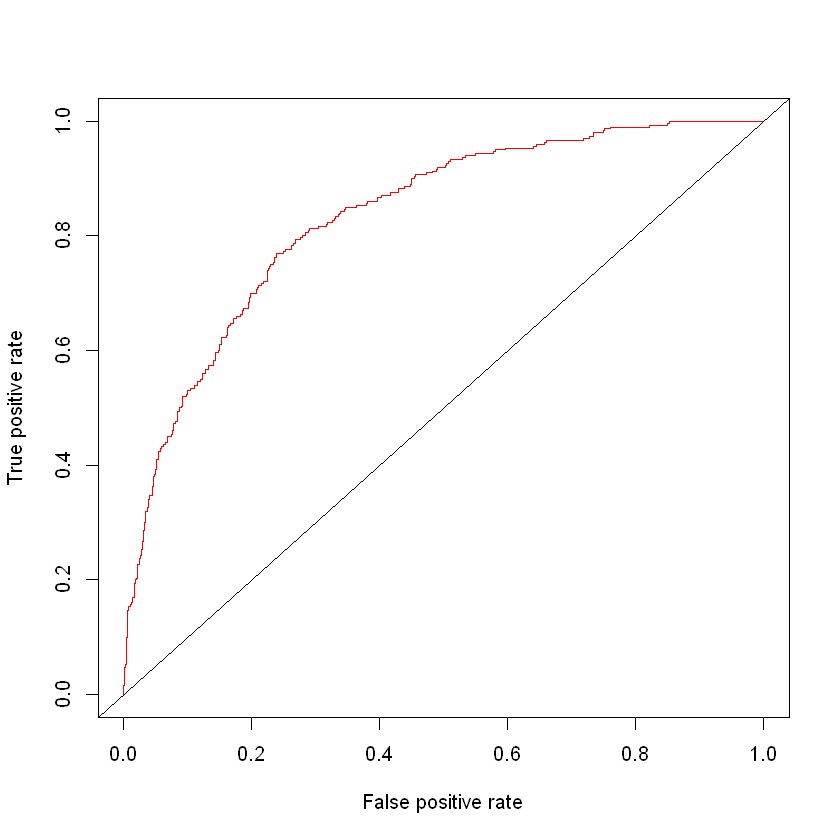

In [33]:
# ROC curve for logistic regression

pred_LR <- prediction(lr.prob, t_y)
pred1_LR <- performance(pred_LR, "tpr", "fpr")


plot(pred1_LR,colorize=FALSE, col = "red")
abline(a=0,b=1)


auc_lr<- performance(pred_LR,"auc")
auc_lr@y.values[[1]]


In [34]:
# Test error rate using LOOCV

model.lr = train(as.factor(Default)~., data_ger, method="glm", family="binomial", metric="Accuracy",
                 trControl=trainControl(method = "LOOCV"))
error.rate = 1 - model.lr$results[2]
error.rate


,Accuracy
,<dbl>
1,0.249


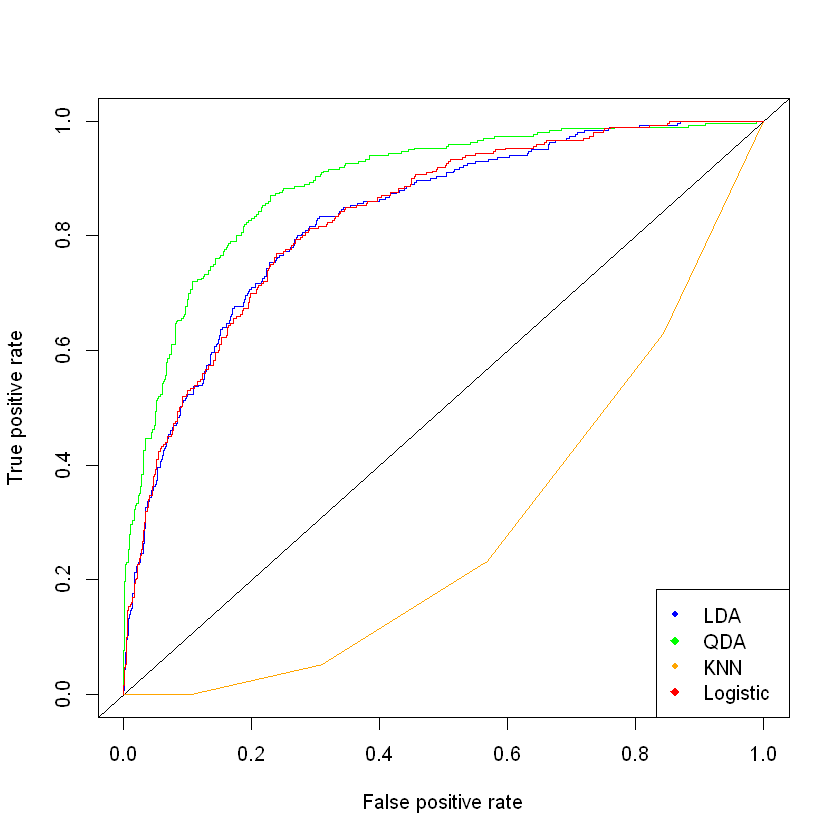

In [35]:
# (h)



plot( perf_l, colorize = FALSE,col="blue")
abline(a=0,b=1)
plot(perf_q,colorize = FALSE, add = TRUE,col="green")
plot(pred1_knn1,colorize = FALSE, add = TRUE,col="orange")
plot(pred1_LR,colorize = FALSE, add = TRUE,col="red")
legend("bottomright", pch = c(20, 18), legend = c("LDA", "QDA", "KNN","Logistic"),col = c("blue","green", "orange","red"))
